<a href="https://colab.research.google.com/github/saun09/Machine-Learning/blob/main/mobile_data_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
#uploaded = files.upload

Saving Mobile-Price-Prediction-cleaned_data.csv to Mobile-Price-Prediction-cleaned_data.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
mob_data=pd.read_csv("Mobile-Price-Prediction-cleaned_data.csv")
mob_data.head(5)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


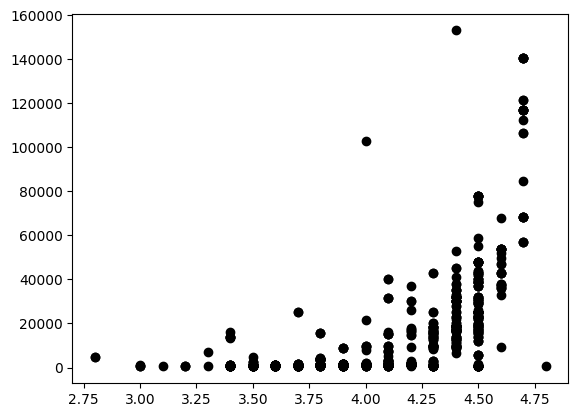

In [10]:
def loss_function(m, b , points):

    Total_error=0
    for i in range (len(points)):
      x=points.iloc[i].Ratings
      y=points.iloc[i].Price
      Total_error+=(y-(m*x+b))**2
    return Total_error/float(len(points))
plt.scatter(mob_data.Ratings, mob_data.Price,color="black")
plt.show()

In [44]:
def gradient_descent(m_now, b_now, L, points):
    m_gradient = 0
    b_gradient = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i].Ratings
        y = points.iloc[i].Price

        # Accumulate the gradient for m and b
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))

    # Update m and b after the loop
    m = m_now - L * m_gradient
    b = b_now - L * b_gradient

    return m, b

Epoch: 0 m: 0 b: 0
Epoch: 50 m: 582.4144294514814 b: 129.93820824488125
Epoch: 100 m: 1068.927798685835 b: 236.73325314579805
Epoch: 150 m: 1475.3971513731126 b: 324.211940729787
Epoch: 200 m: 1815.0575965726864 b: 395.5683212886094
Epoch: 250 m: 2098.9558410644713 b: 453.468314439916
Final m: 2336.312037862612 Final b: 500.13703461637374


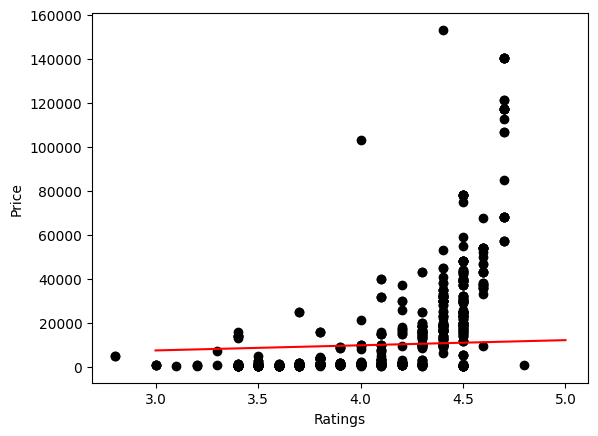

In [45]:
m = 0
b = 0
L = 0.0001
epochs = 300

for i in range(epochs):
    if i % 50 == 0:
        print("Epoch:", i, "m:", m, "b:", b)
    m, b = gradient_descent(m, b, L, mob_data)

print("Final m:", m, "Final b:", b)

plt.scatter(mob_data.Ratings, mob_data.Price, color="black")
x_values = list(range(3, 6))
y_values = [m * x + b for x in x_values]

plt.plot(x_values, y_values, color="red")
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()